In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
# extract specific data from loaded csv's
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
batting_by_years = batting[batting['yearID'].isin(years)]

In [4]:
batting_by_years = batting_by_years.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2007,CHA,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2008,BOS,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2009,SEA,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2010,SEA,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2012,NYA,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2013,NYN,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2015,ATL,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
7,abadfe01,2010,HOU,1,22,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
8,abadfe01,2011,HOU,1,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,abadfe01,2012,HOU,1,37,7,0,1,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0


In [5]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,2012.090129,1.085901,49.098392,116.901864,15.146243,30.084043,5.979502,0.620844,3.487733,14.427071,1.997310,0.751842,10.773877,25.274934,0.779579,1.141375,0.977964,0.901928,2.634104
std,3.176328,0.298813,45.239775,178.353290,25.608784,49.132340,10.176789,1.524533,7.187889,25.207698,5.692988,1.839293,19.093810,37.822372,2.277744,2.503591,2.115748,1.789872,4.695903
min,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,1.000000,32.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,72.000000,170.000000,19.000000,41.000000,8.000000,0.000000,3.000000,18.000000,1.000000,1.000000,14.000000,36.500000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2017.000000,6.000000,163.000000,716.000000,143.000000,238.000000,56.000000,23.000000,59.000000,156.000000,78.000000,23.000000,143.000000,223.000000,44.000000,30.000000,20.000000,15.000000,32.000000


In [6]:
batting_by_years.shape

(15611, 21)

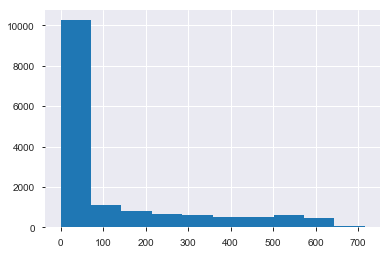

In [7]:
batting_by_years['AB'].hist()

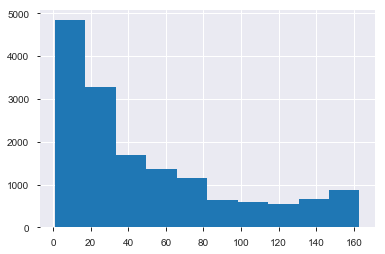

In [8]:
batting_by_years['G'].hist()

In [9]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0


In [10]:
# # define a function that makes sure that only players that are in all five years are included
# def find_players_in_all_years(records):
#     # create list with all playerID's
#     list_of_IDs = list(records['playerID'])
#     all_years = set()
    
#     # iterate through list of ID's and count how many times it occurs in the list
#     for player in list_of_IDs:
#         if (list_of_IDs.count(player)) == len(years):
#             all_years.add(player)
            
#     # return dataframe with players in all desired years
#     return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
# batting_by_years_agg = find_players_in_all_years(batting_by_years)
# batting_by_years_agg.head(20)

In [12]:
batting_by_years.shape

(6766, 21)

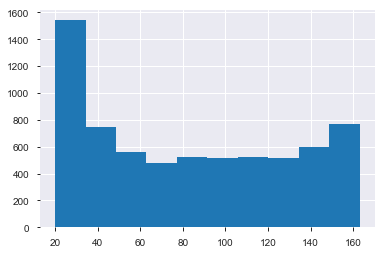

In [13]:
batting_by_years['G'].hist()

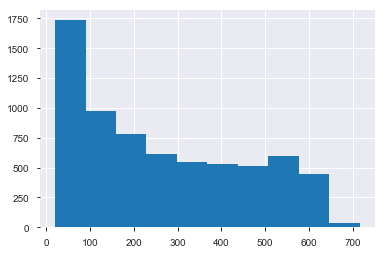

In [14]:
batting_by_years['AB'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years = batting_by_years.join(people, on='playerID', how='inner')

In [19]:
batting_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [20]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [21]:
# convert bats and throws columns
batting_by_years['throws_R'] = batting_by_years['throws'].apply(bats_throws)
batting_by_years['bats_R'] = batting_by_years['bats'].apply(bats_throws)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0


In [22]:
# create column for batting average
batting_by_years['AVE'] = batting_by_years['H'] / batting_by_years['AB']

In [23]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years['AB'] + batting_by_years['BB'] + batting_by_years['SF'] + batting_by_years['HBP']
batting_by_years['OBP'] = (batting_by_years['H'] + batting_by_years['BB'] + batting_by_years['HBP']) / plate_appearances

In [24]:
# create slugging percent column
single = ((batting_by_years['H'] - batting_by_years['2B']) - batting_by_years['3B']) - batting_by_years['HR']
batting_by_years['Slug_Percent'] = ((batting_by_years['HR'] * 4) +
                                        (batting_by_years['3B'] * 3) +
                                        (batting_by_years['2B'] * 2) +
                                        single) / batting_by_years['AB']

In [25]:
# create on base plus slugging percent column
hr = batting_by_years['HR'] * 4
triple = batting_by_years['3B'] * 3
double = batting_by_years['2B'] * 2
batting_by_years['OPS'] = batting_by_years['OBP'] + batting_by_years['Slug_Percent']

In [26]:
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572


In [27]:
batting_by_years.isnull().sum()

playerID        0
yearID          0
teamID          0
stint           0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
nameFirst       0
nameLast        0
bats            0
throws          0
debut           0
throws_R        0
bats_R          0
AVE             0
OBP             0
Slug_Percent    0
OPS             0
dtype: int64

In [28]:
from datetime import datetime

In [29]:
# convert debut to datetime
batting_by_years['debut'] = pd.to_datetime(batting_by_years['debut'])

In [30]:
# create new columns for debutYear and finalYear 
batting_by_years['debutYear'] = pd.to_numeric(batting_by_years['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years['currentYear'] = batting_by_years['yearID'] 
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014


In [31]:
# create a years in the league up to that point column
batting_by_years['YRSPRO'] = batting_by_years['currentYear'] - batting_by_years['debutYear']

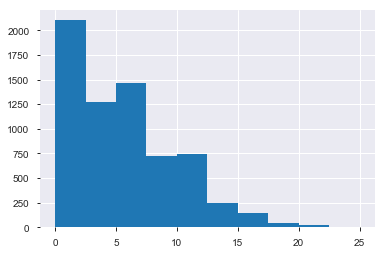

In [32]:
batting_by_years['YRSPRO'].hist()

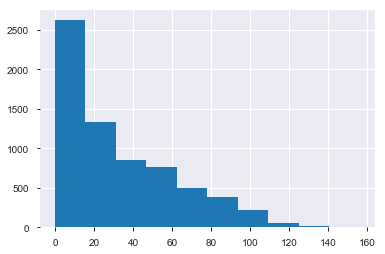

In [33]:
batting_by_years['RBI'].hist()

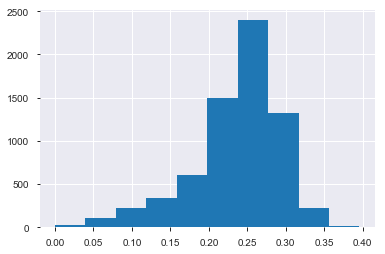

In [34]:
batting_by_years['AVE'].hist()

In [35]:
batting_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [62]:
change_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']

# percent_change = batting_by_years[change_cols].pct_change().replace(np.inf, np.nan)

In [63]:
percent_change = batting_by_years.groupby('playerID')[change_cols].pct_change().replace(np.inf, np.nan)

In [64]:
percent_change.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,-0.028571,-0.276316,-0.375000,0.133333,0.666667,NaN,0.00,0.000000,-0.285714,1.000000,-0.500000,0.045455,NaN,0.000000,NaN,NaN,-1.000000,0.566061,0.427297,0.612121,0.532785
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.20,0.25,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,NaN,-0.666667,NaN,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.25,-0.25,0.030000,0.363636,-0.272727,0.287671,0.036697,2.5,0.000000,NaN,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930


In [65]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years, percent_change.rename(columns={
    'G': 'G_chg', 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B_chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [66]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [67]:
batter_and_change.shape

(6766, 56)

In [41]:
# batter_and_change.to_csv('batter_and_change.csv')

In [68]:
batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
batter_and_change[batter_and_change['playerID'] == 'abreubo01']

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321


In [70]:
batter_and_change['bats_R'].value_counts(normalize=True)

1    0.553355
0    0.446645
Name: bats_R, dtype: float64

In [71]:
batter_and_change[(batter_and_change['teamID'] == 'CHN') & (batter_and_change['currentYear'] == 2016)]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
213,almoral01,2016,CHN,1,47,112,14,31,9,1,3,14.0,0.0,0.0,5,20.0,0.0,0.0,0.0,0.0,5.0,Albert,Almora,R,R,2016-06-07,1,1,0.276786,0.307692,0.455357,0.763049,2016,2016,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
443,arrieja01,2016,CHN,1,31,65,7,17,2,1,2,7.0,0.0,0.0,4,28.0,0.0,0.0,1.0,0.0,1.0,Jake,Arrieta,R,R,2010-06-10,1,1,0.261538,0.304348,0.415385,0.719732,2010,2016,6,-0.060606,-0.177215,0.400000,0.416667,1.000000,0.000000,0.000000,2.500000,0.000000,0.000000,3.000000,-0.377778,0.000000,0.000000,-0.666667,0.000000,0.000000,0.721795,0.872910,0.562637,0.680351
596,baezja01,2016,CHN,1,142,421,50,115,19,1,14,59.0,12.0,3.0,15,108.0,3.0,11.0,1.0,2.0,8.0,Javier,Baez,R,R,2014-08-05,1,1,0.273159,0.314031,0.422803,0.736834,2014,2016,2,4.071429,4.539474,11.500000,4.227273,2.166667,0.000000,13.000000,13.750000,11.000000,0.500000,2.750000,3.500000,2.000000,0.000000,0.000000,0.000000,0.000000,-0.056359,-0.033750,0.036549,0.005375
1725,bryankr01,2016,CHN,1,155,603,121,176,35,3,39,102.0,8.0,5.0,75,154.0,5.0,18.0,0.0,3.0,3.0,Kris,Bryant,R,R,2015-04-17,1,1,0.291874,0.384835,0.553897,0.938733,2015,2016,1,0.026490,0.078712,0.390805,0.142857,0.129032,-0.400000,0.500000,0.030303,-0.384615,0.250000,-0.025974,-0.226131,0.000000,1.000000,0.000000,-0.400000,-0.571429,0.059465,0.042263,0.134170,0.094601
2804,coghlch01,2016,CHN,2,48,103,21,26,7,2,1,16.0,1.0,0.0,22,26.0,2.0,2.0,0.0,1.0,2.0,Chris,Coghlan,L,R,2009-05-08,1,0,0.252427,0.390625,0.388350,0.778975,2009,2016,7,-0.675676,-0.765909,-0.671875,-0.763636,-0.720000,-0.666667,-0.937500,-0.609756,-0.909091,-1.000000,-0.620690,-0.723404,-0.666667,-0.333333,-1.000000,0.000000,-0.750000,0.009709,0.146747,-0.123724,-0.006181
2937,contrwi01,2016,CHN,1,76,252,33,71,14,1,12,35.0,2.0,2.0,26,67.0,0.0,4.0,0.0,1.0,7.0,Willson,Contreras,R,R,2016-06-17,1,1,0.281746,0.356890,0.488095,0.844986,2016,2016,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4570,fowlede01,2016,CHN,1,125,456,84,126,25,7,13,48.0,13.0,4.0,79,124.0,0.0,11.0,1.0,4.0,3.0,Dexter,Fowler,B,R,2008-09-02,1,0,0.276316,0.392727,0.447368,0.840096,2008,2016,8,-0.198718,-0.234899,-0.176471,-0.154362,-0.137931,-0.125000,-0.235294,0.043478,-0.350000,-0.428571,-0.059524,-0.194805,-1.000000,1.200000,-0.500000,0.333333,-0.250000,0.105263,0.135279,0.088292,0.109764
5862,hammeja01,2016,CHN,1,35,65,6,16,3,0,0,7.0,0.0,0.0,1,24.0,0.0,0.0,3.0,0.0,0.0,Jason,Hammel,R,R,2006-04-11,1,1,0.246154,0.257576,0.292308,0.549883,2006,2016,10,0.093750,0.000000,0.000000,0.454545,2.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.454545,0.438131,0.583333,0.511832
6187,hendrky01,2016,CHN,1,32,58,1,8,0,0,0,2.0,0.0,0.0,1,29.0,0.0,1.0,8.0,0.0,0.0,Kyle,Hendricks,R,R,2014-07-10,1,1,0.137931,0.166667,0.137931,0.304598,2014,2016,2,0.000000,-0.033333,-0.500000,1.666667,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.208333,0.000000,0.000000,1.666667,0.000000,-1.000000,1.758621,1.541667,1.068966,1.303363
6377,heywaja01,2016,CHN,1,142,530,61,122,27,1,7,49.0,11.0,4.0,54,93.0,0.0,5.0,1.0,2.0,12.0,Jason,Heyward,L,L,2010-04-05,0,0,0.230189,0.306261,0.324528,0.630789,2010,2016,6,-0.077922,-0.031079,-0.227848,-0.237500,-0.181818,-0.750000,-0.461538,-0.183333,-0.521739,0.333333,-0.035714,0.033333,-1.000000,1.500000,0.000000,-0.333333,-0.076923,-0.213042,-0.145842,-0.260346,-0.208853


In [72]:
# RBI's is the target
attributes = ['stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'throws_R', 'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'YRSPRO', 
       'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'HR_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'AVE_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg']

In [73]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

,stint,G,AB,R,H,2B,3B,HR,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,1,35,76,16,15,3,0,2,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,1,1,0.197368,0.237500,0.315789,0.553289,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,1,34,55,10,17,5,0,2,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,1,1,0.309091,0.338983,0.509091,0.848074,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,1,158,605,123,171,40,5,16,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,1,0,0.282645,0.369099,0.444628,0.813727,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,1,156,609,100,180,39,4,20,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,1,0,0.295567,0.371345,0.471264,0.842609,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,1,152,563,96,165,29,3,15,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,1,0,0.293073,0.389805,0.435169,0.824974,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,1,154,573,88,146,41,1,20,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,1,0,0.254799,0.352324,0.434555,0.786879,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,1,142,502,54,127,30,1,8,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,1,0,0.252988,0.352740,0.364542,0.717282,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,2,92,195,28,48,8,1,3,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,1,0,0.246154,0.360870,0.343590,0.704459,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,1,78,133,12,33,9,0,1,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,1,0,0.248120,0.341935,0.338346,0.680281,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,1,145,556,80,176,35,2,36,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,1,1,0.316547,0.382637,0.580935,0.963572,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
ss = StandardScaler()
X_sc = ss.fit_transform(data_attributes)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [77]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.2393430671336875],
 3: [0.23461502652751098],
 4: [0.13283814636627708],
 5: [0.13492145165812158],
 6: [0.1047648767985149],
 7: [0.10563004118224478],
 8: [0.10784544834065715],
 9: [0.11192294857780924],
 10: [0.09176051768676342]}

In [78]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [79]:
labels

array([4, 4, 2, ..., 4, 4, 2])

In [80]:
batter_and_change['KMeans_label'] = labels
attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785,4
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494,2
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930,2
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177,2
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447,2
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876,4
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,4
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [81]:
batter_and_change['KMeans_label'].value_counts()

4    3018
2    2154
1    1146
3     322
0     126
Name: KMeans_label, dtype: int64

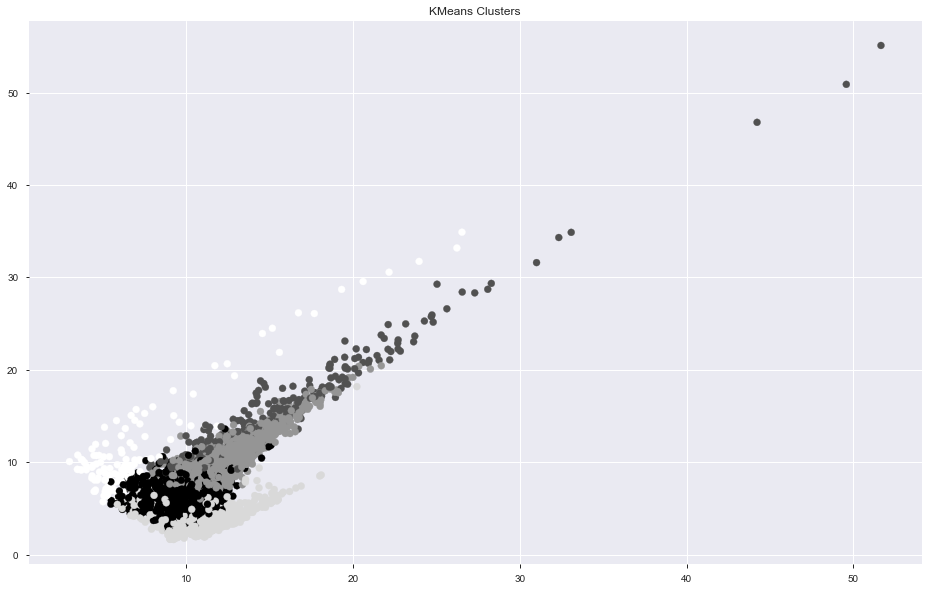

In [82]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [83]:
batter_and_change[batter_and_change['KMeans_label'] == 0]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
217,alonsyo01,2011,CIN,1,47,88,9,29,4,0,5,15.0,0.0,0.0,10,21.0,0.0,0.0,0.0,0.0,2.0,Yonder,Alonso,L,R,2010-09-01,1,0,0.329545,0.397959,0.545455,0.943414,2010,2011,1,1.136364,2.034483,3.500000,3.833333,1.000000,0.0,0.00,4.000000,0.000000,0.0,0.000000,1.100000,0.0,0.0,0.000000,0.000000,1.000000,0.592803,0.923469,0.977273,0.954214,0
310,anderch01,2015,ARI,1,28,48,0,5,0,0,0,3.0,0.0,0.0,1,23.0,0.0,0.0,8.0,0.0,2.0,Chase,Anderson,R,R,2014-05-11,1,1,0.104167,0.122449,0.104167,0.226616,2014,2015,1,0.272727,0.411765,0.000000,4.000000,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.642857,0.0,-1.0,0.333333,0.000000,0.000000,2.541667,1.142857,2.541667,1.618181,0
328,anderma02,2007,NYN,2,43,69,14,22,7,0,3,25.0,3.0,1.0,5,12.0,1.0,0.0,1.0,2.0,2.0,Marlon,Anderson,L,R,1998-09-08,1,0,0.318841,0.355263,0.550725,0.905988,1998,2007,9,0.869565,1.653846,3.666667,2.666667,0.000000,0.0,0.00,11.500000,2.000000,0.0,0.666667,1.400000,0.0,0.0,0.000000,0.000000,0.000000,0.381643,0.144737,1.386473,0.674301,0
443,arrieja01,2016,CHN,1,31,65,7,17,2,1,2,7.0,0.0,0.0,4,28.0,0.0,0.0,1.0,0.0,1.0,Jake,Arrieta,R,R,2010-06-10,1,1,0.261538,0.304348,0.415385,0.719732,2010,2016,6,-0.060606,-0.177215,0.400000,0.416667,1.000000,0.0,0.00,2.500000,0.000000,0.0,3.000000,-0.377778,0.0,0.0,-0.666667,0.000000,0.000000,0.721795,0.872910,0.562637,0.680351,0
615,baileho02,2011,CIN,1,23,39,7,11,2,0,0,2.0,0.0,0.0,1,11.0,0.0,0.0,5.0,0.0,1.0,Homer,Bailey,R,R,2007-06-08,1,1,0.282051,0.300000,0.333333,0.633333,2007,2011,4,0.045455,0.026316,0.000000,2.666667,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,-0.352941,0.0,0.0,0.000000,0.000000,0.000000,2.572650,2.800000,3.222222,3.011111,0
1182,billich01,2009,LAN,1,33,56,2,10,2,0,1,4.0,0.0,0.0,4,24.0,0.0,0.0,7.0,0.0,1.0,Chad,Billingsley,R,R,2006-06-15,1,1,0.178571,0.233333,0.267857,0.501190,2006,2009,3,-0.057143,-0.111111,1.000000,0.666667,0.000000,0.0,0.00,0.333333,0.000000,0.0,0.000000,-0.333333,0.0,0.0,0.400000,0.000000,0.000000,0.875000,0.563333,1.812500,1.049927,0
1253,blanche01,2008,CHN,1,58,120,15,35,3,0,3,12.0,0.0,0.0,6,22.0,1.0,0.0,2.0,0.0,4.0,Henry,Blanco,R,R,1997-07-25,1,1,0.291667,0.325397,0.391667,0.717063,1997,2008,11,1.636364,1.222222,4.000000,2.888889,0.000000,0.0,0.00,2.000000,0.000000,0.0,2.000000,0.833333,0.0,0.0,1.000000,-1.000000,0.000000,0.750000,0.686147,0.762500,0.727012,0
1812,bumgama01,2014,SFN,1,34,66,10,17,2,0,4,15.0,0.0,0.0,2,29.0,0.0,1.0,8.0,1.0,0.0,Madison,Bumgarner,R,L,2009-09-08,0,1,0.257576,0.285714,0.469697,0.755411,2009,2014,5,0.096774,0.178571,2.333333,1.833333,0.000000,0.0,0.00,2.750000,0.000000,0.0,-0.600000,-0.033333,0.0,0.0,0.142857,0.000000,-1.000000,1.404040,0.610390,3.383838,1.654644,0
1843,burneaj01,2014,PHI,1,34,60,5,8,2,0,0,1.0,0.0,0.0,3,23.0,0.0,0.0,2.0,0.0,2.0,A. J.,Burnett,R,R,1999-08-17,1,1,0.133333,0.174603,0.166667,0.341270,1999,2014,15,0.133333,0.016949,4.000000,1.000000,0.000000,0.0,0.00,-0.500000,0.000000,0.0,0.500000,-0.303030,0.0,0.0,-0.666667,0.000000,0.000000,0.966667,0.775132,1.458333,1.053897,0
1903,bushda01,2009,MIL,1,22,34,2,4,0,0,0,0.0,0.0,0.0,4,16.0,0.0,0.0,2.0,0.0,0.0,Dave,Bush,R,R,2004-07-02,1,1,0.117647,0.210526,0.117647,0.328173,2004,2009,5,-0.312500,-0.403509,0.000000,-0.200000,-1.000000,0.0,0.00,0.000000,0.000000,0.0,3.000000,-0.238095,0.0,0.0,-0.600000,0.000000,0.000000,0.341176,1.035088,0.117647,0.572379,0


In [57]:
batter_and_change['yearID'].value_counts()

2011    637
2012    636
2015    624
2010    621
2014    613
2017    612
2013    609
2007    605
2008    605
2009    602
2016    602
Name: yearID, dtype: int64

In [61]:
batter_and_change['playerID'].value_counts()

johnske05    13
pencehu01    13
bournmi01    13
gomezca01    13
beltrca01    13
drewst01     13
hillaa01     13
aybarer01    12
deazaal01    12
bonifem01    12
uptonju01    12
encared01    12
davisra01    12
gonzaad01    12
reyesjo01    12
kempma01     12
reynoma01    12
hollima01    12
cabreme01    12
peraljh01    12
byrdma01     12
tulowtr01    12
escobyu01    12
callaal01    12
bautijo02    12
suzukic01    12
suzukku01    12
youngch04    12
grandcu01    12
bruceja01    12
             ..
cardead01     1
jamesch03     1
dahlda01      1
bacsimi02     1
dumatph01     1
russoke01     1
rivaslu01     1
willitr01     1
johnsmi04     1
lugose01      1
thormsc01     1
carlybu01     1
perezne01     1
turnest01     1
mazalu01      1
hamilma01     1
cecchga02     1
pompeda01     1
koberje01     1
diazar01      1
romerst01     1
glavito02     1
davisjd01     1
perezeu01     1
pauljo01      1
peterbr02     1
parkeky01     1
robindr01     1
choiji01      1
everito01     1
Name: playerID, Length: 

Modeling

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [87]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [130]:
# set X and y
X = batter_and_change[attributes]
y = batter_and_change['RBI']

Linear Regression

In [131]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [132]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9622492083212371


In [133]:
# gridsearch for best parameters

gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr_gridsearch = GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [134]:
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.8s finished


In [141]:
# Best parameters on the training data:
lr_gridsearch.best_params_

{'fit_intercept': False, 'normalize': True}

In [135]:
# accuracy score on train data
print(lr_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

# accuracy score on test data
print(best_lr.score(X_test, y_test))

0.9619355076991656
0.9622486490725832


In [136]:
lrpreds = best_lr.predict(X_test)

In [137]:
lrpreds

array([ 0.89669568, 26.4984068 , 50.20577951, ..., 85.45571652,
        7.35863854, 12.49468327])

In [138]:
y_test

1082       0.0
14981     27.0
497       52.0
9776      30.0
1234       7.0
6852      28.0
3299       5.0
329       10.0
15513     91.0
9955      12.0
5432      13.0
5334       4.0
13722     70.0
145        5.0
1235      12.0
10363     32.0
2359      17.0
13446     86.0
12690     24.0
9167       7.0
1108       5.0
6288       5.0
8115      78.0
3655       0.0
4679      98.0
559       19.0
2480      12.0
1923      93.0
3859      92.0
14568     32.0
         ...  
6776      10.0
4315      16.0
2660      40.0
12572     20.0
4154      11.0
7069      61.0
5947       2.0
10726      8.0
2445      65.0
6524      64.0
8427       3.0
2662      17.0
5944       6.0
5203      62.0
9472       2.0
8857       9.0
12528      0.0
9915      55.0
11743     14.0
6283       7.0
4388      16.0
8798      69.0
1375       3.0
8889      84.0
7827     100.0
5419      13.0
7632       5.0
3239      77.0
12633      9.0
14003     12.0
Name: RBI, Length: 1692, dtype: float64

In [139]:
results = pd.DataFrame()
results['y_true'] = y_test
results['lrpreds'] = lrpreds
results.head()

,y_true,lrpreds
1082,0.0,0.896696
14981,27.0,26.498407
497,52.0,50.205780
9776,30.0,33.618644
1234,7.0,5.152575


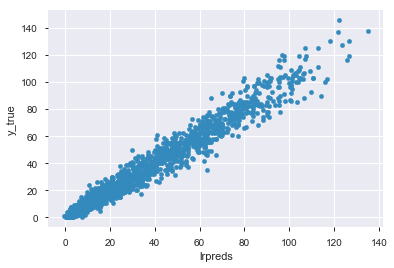

In [140]:
results.plot('lrpreds', 'y_true', kind='scatter')

Ridge

In [173]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [174]:
ridge = Ridge()
ridge.fit(X_train_sc, y_train)
print(ridge.score(X_test_sc, y_test))

0.9620099788460412


In [175]:
# gridsearch for best parameters

gs_params = {
    'alpha': [1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

ridge_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [176]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    3.2s finished


In [177]:
# Best parameters on the training data:
ridge_gridsearch.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': False}

In [178]:
# accuracy score on train data
print(ridge_gridsearch.best_score_)

# assign the best estimator to a variable:
best_ridge = ridge_gridsearch.best_estimator_

# accuracy score on test data
print(best_ridge.score(X_test_sc, y_test))

0.9619312622112884
0.9620099788460412


In [179]:
ridgepreds = best_ridge.predict(X_test_sc)

In [180]:
results['ridgepreds'] = ridgepreds
results.head()

,y_true,lrpreds,ridgepreds,lassopreds
1082,0.0,0.896696,0.592079,0.263766
14981,27.0,26.498407,26.311706,26.262948
497,52.0,50.205780,49.803229,49.388964
9776,30.0,33.618644,33.296507,33.318472
1234,7.0,5.152575,4.882762,4.992067


Lasso

In [181]:
lasso = Lasso()
lasso.fit(X_train_sc, y_train)
print(lasso.score(X_test_sc, y_test))

0.9581070299488457


In [182]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [183]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    1.7s finished


In [184]:
# Best parameters on the training data:
lasso_gridsearch.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'normalize': False}

In [185]:
# accuracy score on train data
print(lasso_gridsearch.best_score_)

# assign the best estimator to a variable:
best_lasso = lasso_gridsearch.best_estimator_

# accuracy score on test data
print(best_lasso.score(X_test_sc, y_test))

0.9619797426825153
0.961943691043451


In [186]:
lassopreds = best_lasso.predict(X_test_sc)

In [187]:
results['lassopreds'] = lassopreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds
1082,0.0,0.896696,0.592079,0.263766
14981,27.0,26.498407,26.311706,26.262948
497,52.0,50.205780,49.803229,49.388964
9776,30.0,33.618644,33.296507,33.318472
1234,7.0,5.152575,4.882762,4.992067
6852,28.0,28.900345,28.877967,29.267998
3299,5.0,5.203680,5.046275,4.921278
329,10.0,12.896465,12.720323,12.437729
15513,91.0,97.574916,97.281495,97.551853
9955,12.0,9.699900,9.436264,9.466699


Elastic Net

In [188]:
enet = ElasticNet()
enet.fit(X_train_sc, y_train)
print(enet.score(X_test_sc, y_test))

0.9398334921555049


In [189]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

enet_gridsearch = GridSearchCV(
    ElasticNet(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [190]:
enet_gridsearch = enet_gridsearch.fit(X_train_sc, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 509 tasks      | elapsed:   21.8s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:   35.3s finished


In [191]:
# Best parameters on the training data:
enet_gridsearch.best_params_

{'alpha': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 500,
 'normalize': False}

In [192]:
# accuracy score on train data
print(enet_gridsearch.best_score_)

# assign the best estimator to a variable:
best_enet = enet_gridsearch.best_estimator_

# accuracy score on test data
print(best_enet.score(X_test_sc, y_test))

0.961960015214795
0.9620088371139259


In [193]:
enetpreds = best_enet.predict(X_test_sc)

In [194]:
results['enetpreds'] = enetpreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds
1082,0.0,0.896696,0.592079,0.263766,0.576452
14981,27.0,26.498407,26.311706,26.262948,26.314822
497,52.0,50.205780,49.803229,49.388964,49.788687
9776,30.0,33.618644,33.296507,33.318472,33.311537
1234,7.0,5.152575,4.882762,4.992067,4.891816
6852,28.0,28.900345,28.877967,29.267998,28.897541
3299,5.0,5.203680,5.046275,4.921278,5.035608
329,10.0,12.896465,12.720323,12.437729,12.686977
15513,91.0,97.574916,97.281495,97.551853,97.298954
9955,12.0,9.699900,9.436264,9.466699,9.420897
